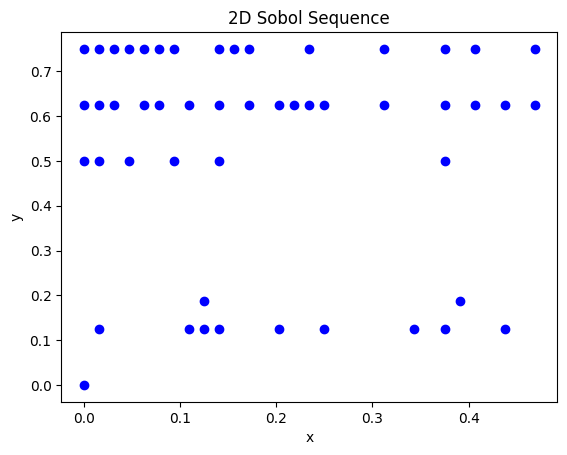

In [6]:
#task1
import numpy as np
import matplotlib.pyplot as plt

def generate_sobol_2d(n, poly, m_vals, v2_vals):
    dim = 2
    sobol_seq = np.zeros((n, dim))
    
    L = len(bin(n-1)) - 2  #bits 
    
    m_vals = np.array(m_vals + [1] * (L - len(m_vals)), dtype=int)
    
    #direction numbers 
    V = np.zeros((dim, L), dtype=float)
    V[1, :len(v2_vals)] = v2_vals
    
    #dynamic programming
    for j in range(len(v2_vals), L):
        V[1, j] = float((m_vals[j] << (j - len(v2_vals))) ^ int(V[1, j - len(v2_vals)] * (1 << (j - len(v2_vals))))) / (1 << j)
    
    #sobol sequence
    x = np.zeros(dim, dtype=int)
    C = np.zeros(n, dtype=int)
    
    for i in range(1, n):
        C[i] = C[i // 2] + (i % 2)
        x[0] ^= 1 << (C[i] - 1)
        x[1] = int(V[1, C[i] - 1] * (1 << L))
        sobol_seq[i, :] = x / (1 << L)
    
    return sobol_seq


n = 50
poly = [1, 1, 1, 1]  #x^3 + x^2 + x + 1
m_vals = [1, 3, 5]  
v2_vals = [1/2, 3/4, 5/8]  


sobol_seq = generate_sobol_2d(n, poly, m_vals, v2_vals)


plt.scatter(sobol_seq[:, 0], sobol_seq[:, 1], marker='o', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('2D Sobol Sequence') 
plt.savefig("sobol_sequence.png")
plt.show()


Surface area using Midpoint Rule: 51.172804
Surface area using Gaussian Quadrature: 51.172805


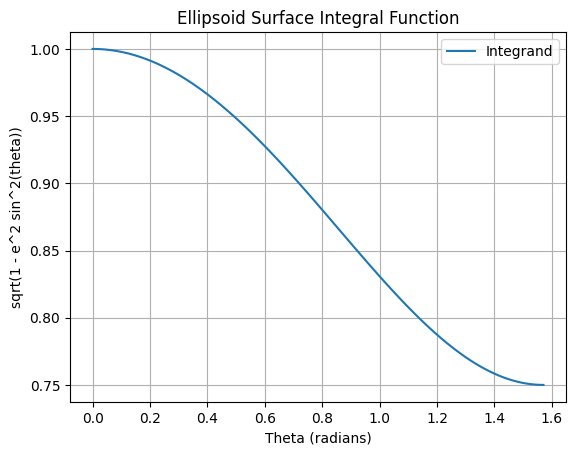

In [7]:
#task2 

import numpy as np
import scipy.special as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def ellipsoid_surface_area(beta, c, method='midpoint', N=100):
    
    e = np.sqrt(1 - (beta**2 / c**2))  #eccentricity e
    
    def integrand(theta):
        return np.sqrt(1 - e**2 * np.sin(theta)**2)
    
    if method == 'midpoint':
        theta_vals = np.linspace(0, np.pi / 2, N + 1)
        midpoints = (theta_vals[:-1] + theta_vals[1:]) / 2
        integral = np.sum(integrand(midpoints)) * (np.pi / (2 * N))
    elif method == 'gaussian':
        integral, _ = integrate.quadrature(integrand, 0, np.pi / 2, tol=1e-6, maxiter=50)
    else:
        raise ValueError("Invalid method. Choose 'midpoint' or 'gaussian'.")
    
    A = 2 * np.pi * c**2 + (2 * np.pi * beta * c / np.sin(np.pi / 2)) * integral
    return A


beta = 1.5
c = 2.0

#surface area using both methods
area_midpoint = ellipsoid_surface_area(beta, c, method='midpoint', N=100)
area_gaussian = ellipsoid_surface_area(beta, c, method='gaussian', N=100)

print(f"Surface area using Midpoint Rule: {area_midpoint:.6f}")
print(f"Surface area using Gaussian Quadrature: {area_gaussian:.6f}")


theta_vals = np.linspace(0, np.pi / 2, 100)
integrand_vals = np.sqrt(1 - (1 - (beta**2 / c**2)) * np.sin(theta_vals)**2)

plt.plot(theta_vals, integrand_vals, label="Integrand")
plt.xlabel("Theta (radians)")
plt.ylabel("sqrt(1 - e^2 sin^2(theta))")
plt.title("Ellipsoid Surface Integral Function")
plt.legend()
plt.grid()
plt.savefig("ellipsoid_surface_integral.png")  
plt.show()


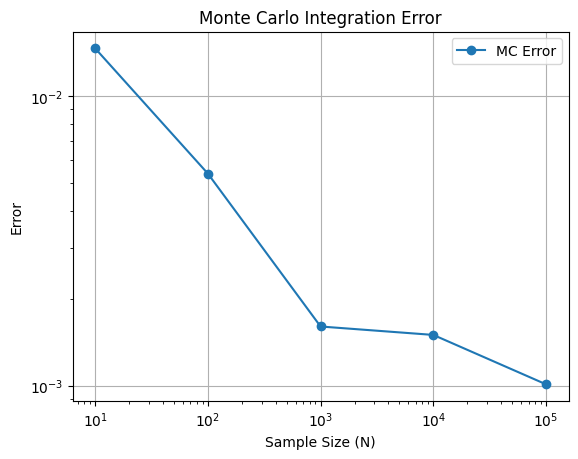

In [9]:
#task2c 

import numpy as np
import scipy.special as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt




N_values = [10, 100, 1000, 10000, 100000]
exact_solution = np.pi / 4  #integral value for 2β = c = 1
errors = []

for N in N_values:
    x_samples = np.random.uniform(-0.5, 0.5, N)
    y_samples = np.random.uniform(-0.5, 0.5, N)
    count_inside = np.sum((x_samples**2 + y_samples**2) <= 0.25)
    mc_area = (count_inside / N)
    errors.append(abs(mc_area - exact_solution))


plt.figure()
plt.loglog(N_values, errors, marker='o', linestyle='-', label='MC Error')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error')
plt.legend()
plt.grid()
plt.savefig("monte_carlo_error.png")  
plt.show()


theta_vals = np.linspace(0, np.pi / 2, 100)
integrand_vals = np.sqrt(1 - (1 - (beta**2 / c**2)) * np.sin(theta_vals)**2)



Surface area using Midpoint Rule: 51.172804
Surface area using Gaussian Quadrature: 51.172805


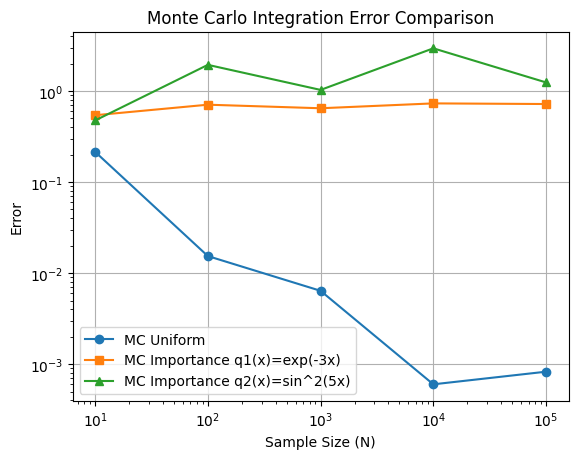

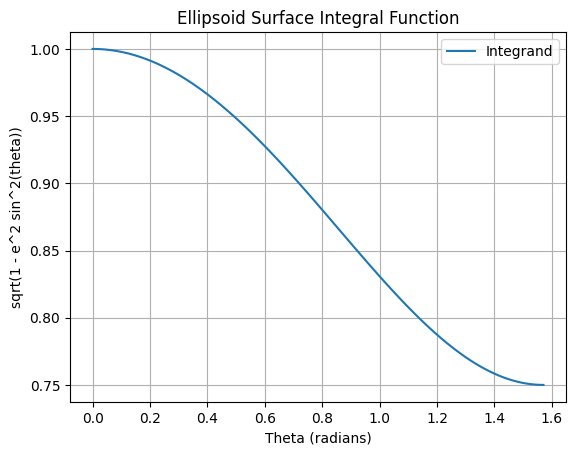

In [11]:
#task2d 

import numpy as np
import scipy.special as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def ellipsoid_surface_area(beta, c, method='midpoint', N=100):
    
    e = np.sqrt(1 - (beta**2 / c**2))  
    
    def integrand(theta):
        return np.sqrt(1 - e**2 * np.sin(theta)**2)
    
    if method == 'midpoint':
        theta_vals = np.linspace(0, np.pi / 2, N + 1)
        midpoints = (theta_vals[:-1] + theta_vals[1:]) / 2
        integral = np.sum(integrand(midpoints)) * (np.pi / (2 * N))
    elif method == 'gaussian':
        integral, _ = integrate.quadrature(integrand, 0, np.pi / 2, tol=1e-6, maxiter=50)
    else:
        raise ValueError("Invalid method. Choose 'midpoint' or 'gaussian'.")
    
    A = 2 * np.pi * c**2 + (2 * np.pi * beta * c / np.sin(np.pi / 2)) * integral
    return A


beta = 1.5
c = 2.0


area_midpoint = ellipsoid_surface_area(beta, c, method='midpoint', N=100)
area_gaussian = ellipsoid_surface_area(beta, c, method='gaussian', N=100)

print(f"Surface area using Midpoint Rule: {area_midpoint:.6f}")
print(f"Surface area using Gaussian Quadrature: {area_gaussian:.6f}")


N_values = [10, 100, 1000, 10000, 100000]
exact_solution = np.pi / 4  
errors_uniform = []
errors_q1 = []
errors_q2 = []

for N in N_values:
    
    x_samples = np.random.uniform(-0.5, 0.5, N)
    y_samples = np.random.uniform(-0.5, 0.5, N)
    count_inside = np.sum((x_samples**2 + y_samples**2) <= 0.25)
    mc_area = (count_inside / N)
    errors_uniform.append(abs(mc_area - exact_solution))
    
    
    u = np.random.uniform(0, 1, N)
    x_samples_q1 = -np.log(1 - u) / 3  
    weights_q1 = np.exp(3 * x_samples_q1)  
    mc_area_q1 = np.mean(weights_q1 * ((x_samples_q1**2) <= 0.25))
    errors_q1.append(abs(mc_area_q1 - exact_solution))
    
    
    u = np.random.uniform(0, 1, N)
    x_samples_q2 = np.arcsin(np.sqrt(u)) / 5  
    weights_q2 = 1 / (5 * np.sin(5 * x_samples_q2) ** 2)  
    mc_area_q2 = np.mean(weights_q2 * ((x_samples_q2**2) <= 0.25))
    errors_q2.append(abs(mc_area_q2 - exact_solution))


plt.figure()
plt.loglog(N_values, errors_uniform, marker='o', linestyle='-', label='MC Uniform')
plt.loglog(N_values, errors_q1, marker='s', linestyle='-', label='MC Importance q1(x)=exp(-3x)')
plt.loglog(N_values, errors_q2, marker='^', linestyle='-', label='MC Importance q2(x)=sin^2(5x)')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error Comparison')
plt.legend()
plt.grid()
plt.savefig("monte_carlo_importance_sampling.png")  
plt.show()


theta_vals = np.linspace(0, np.pi / 2, 100)
integrand_vals = np.sqrt(1 - (1 - (beta**2 / c**2)) * np.sin(theta_vals)**2)

plt.plot(theta_vals, integrand_vals, label="Integrand")
plt.xlabel("Theta (radians)")
plt.ylabel("sqrt(1 - e^2 sin^2(theta))")
plt.title("Ellipsoid Surface Integral Function")
plt.legend()
plt.grid()
plt.savefig("ellipsoid_surface_integral.png")  
plt.show()


Surface area using Midpoint Rule: 51.172804
Surface area using Gaussian Quadrature: 51.172805


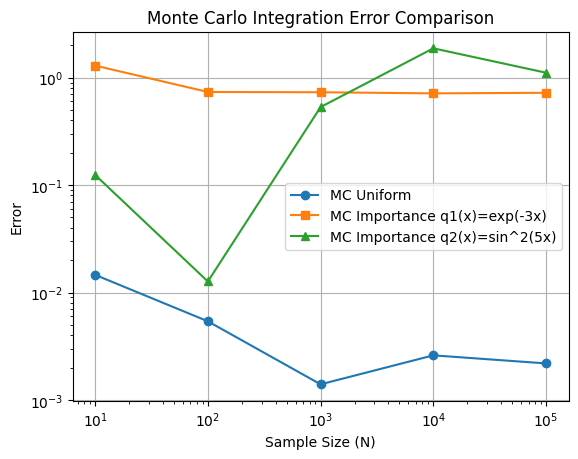

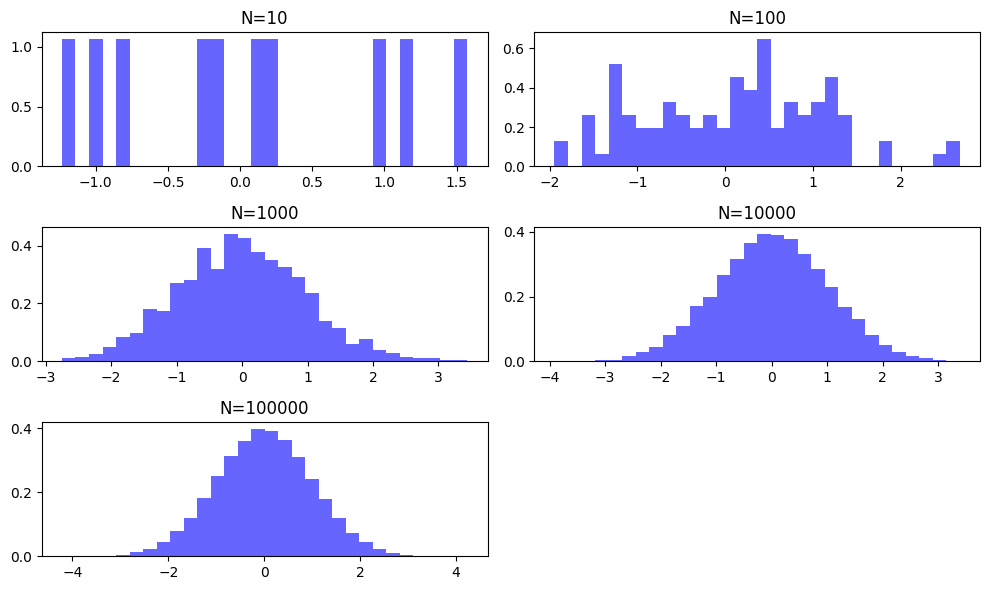

In [12]:
#task2e 

import numpy as np
import scipy.special as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt



def box_muller_transform(mu, sigma, N):
   
    U1, U2 = np.random.uniform(0, 1, N//2), np.random.uniform(0, 1, N//2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    samples = np.concatenate((Z1, Z2)) * sigma + mu
    return samples[:N]


beta = 1.5
c = 2.0


area_midpoint = ellipsoid_surface_area(beta, c, method='midpoint', N=100)
area_gaussian = ellipsoid_surface_area(beta, c, method='gaussian', N=100)

print(f"Surface area using Midpoint Rule: {area_midpoint:.6f}")
print(f"Surface area using Gaussian Quadrature: {area_gaussian:.6f}")


N_values = [10, 100, 1000, 10000, 100000]
exact_solution = np.pi / 4  
errors_uniform = []
errors_q1 = []
errors_q2 = []

for N in N_values:
   
    x_samples = np.random.uniform(-0.5, 0.5, N)
    y_samples = np.random.uniform(-0.5, 0.5, N)
    count_inside = np.sum((x_samples**2 + y_samples**2) <= 0.25)
    mc_area = (count_inside / N)
    errors_uniform.append(abs(mc_area - exact_solution))
    
   
    u = np.random.uniform(0, 1, N)
    x_samples_q1 = -np.log(1 - u) / 3  
    weights_q1 = np.exp(3 * x_samples_q1)  
    mc_area_q1 = np.mean(weights_q1 * ((x_samples_q1**2) <= 0.25))
    errors_q1.append(abs(mc_area_q1 - exact_solution))
    
    
    u = np.random.uniform(0, 1, N)
    x_samples_q2 = np.arcsin(np.sqrt(u)) / 5  
    weights_q2 = 1 / (5 * np.sin(5 * x_samples_q2) ** 2)  
    mc_area_q2 = np.mean(weights_q2 * ((x_samples_q2**2) <= 0.25))
    errors_q2.append(abs(mc_area_q2 - exact_solution))


plt.figure()
plt.loglog(N_values, errors_uniform, marker='o', linestyle='-', label='MC Uniform')
plt.loglog(N_values, errors_q1, marker='s', linestyle='-', label='MC Importance q1(x)=exp(-3x)')
plt.loglog(N_values, errors_q2, marker='^', linestyle='-', label='MC Importance q2(x)=sin^2(5x)')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error Comparison')
plt.legend()
plt.grid()
plt.savefig("monte_carlo_importance_sampling.png")  
plt.show()


mu, sigma = 0, 1
plt.figure(figsize=(10, 6))
for i, N in enumerate(N_values):
    samples = box_muller_transform(mu, sigma, N)
    plt.subplot(3, 2, i + 1)
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')
    plt.title(f'N={N}')
plt.tight_layout()
plt.savefig("box_muller_histograms.png")  
plt.show()


Surface area using Midpoint Rule: 51.172804
Surface area using Gaussian Quadrature: 51.172805


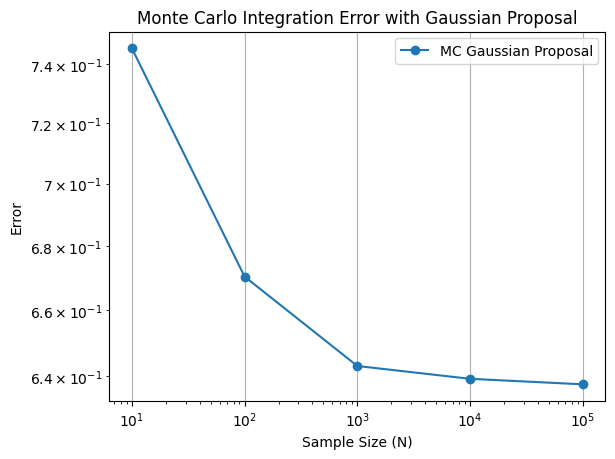

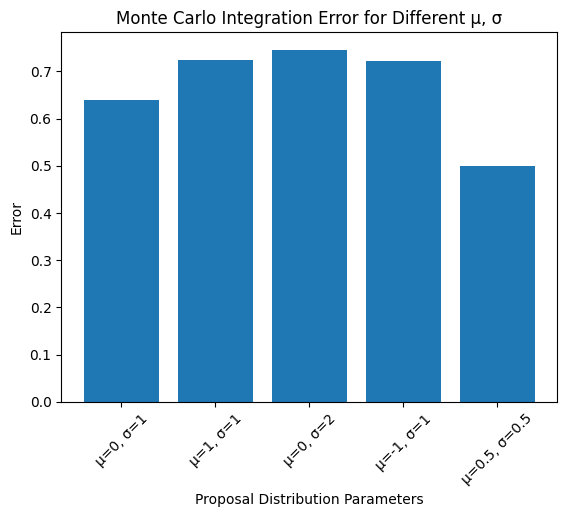

In [13]:
#task2f 

import numpy as np
import scipy.special as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def ellipsoid_surface_area(beta, c, method='midpoint', N=100):
   
    e = np.sqrt(1 - (beta**2 / c**2))  
    
    def integrand(theta):
        return np.sqrt(1 - e**2 * np.sin(theta)**2)
    
    if method == 'midpoint':
        theta_vals = np.linspace(0, np.pi / 2, N + 1)
        midpoints = (theta_vals[:-1] + theta_vals[1:]) / 2
        integral = np.sum(integrand(midpoints)) * (np.pi / (2 * N))
    elif method == 'gaussian':
        integral, _ = integrate.quadrature(integrand, 0, np.pi / 2, tol=1e-6, maxiter=50)
    else:
        raise ValueError("Invalid method. Choose 'midpoint' or 'gaussian'.")
    
    A = 2 * np.pi * c**2 + (2 * np.pi * beta * c / np.sin(np.pi / 2)) * integral
    return A

def box_muller_transform(mu, sigma, N):
   
    U1, U2 = np.random.uniform(0, 1, N//2), np.random.uniform(0, 1, N//2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z2 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    samples = np.concatenate((Z1, Z2)) * sigma + mu
    return samples[:N]


beta = 1.5
c = 2.0


area_midpoint = ellipsoid_surface_area(beta, c, method='midpoint', N=100)
area_gaussian = ellipsoid_surface_area(beta, c, method='gaussian', N=100)

print(f"Surface area using Midpoint Rule: {area_midpoint:.6f}")
print(f"Surface area using Gaussian Quadrature: {area_gaussian:.6f}")


N_values = [10, 100, 1000, 10000, 100000]
exact_solution = np.pi / 4  
errors_gaussian = []

for N in N_values:
    samples = box_muller_transform(mu=0, sigma=1, N=N)
    weights = np.exp(-samples**2 / 2) / np.sqrt(2 * np.pi)  
    mc_area = np.mean(weights * ((samples**2) <= 0.25))
    errors_gaussian.append(abs(mc_area - exact_solution))


mu_sigma_values = [(0, 1), (1, 1), (0, 2), (-1, 1), (0.5, 0.5)]
errors_varied = []

for mu, sigma in mu_sigma_values:
    samples = box_muller_transform(mu=mu, sigma=sigma, N=10000)
    weights = np.exp(-((samples - mu)**2) / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))
    mc_area = np.mean(weights * ((samples**2) <= 0.25))
    errors_varied.append(abs(mc_area - exact_solution))


plt.figure()
plt.loglog(N_values, errors_gaussian, marker='o', linestyle='-', label='MC Gaussian Proposal')
plt.xlabel('Sample Size (N)')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error with Gaussian Proposal')
plt.legend()
plt.grid()
plt.savefig("monte_carlo_gaussian_proposal.png")  
plt.show()


plt.figure()
plt.bar([f"μ={mu}, σ={sigma}" for mu, sigma in mu_sigma_values], errors_varied)
plt.xlabel('Proposal Distribution Parameters')
plt.ylabel('Error')
plt.title('Monte Carlo Integration Error for Different μ, σ')
plt.xticks(rotation=45)
plt.savefig("monte_carlo_varied_gaussian.png")  
plt.show()


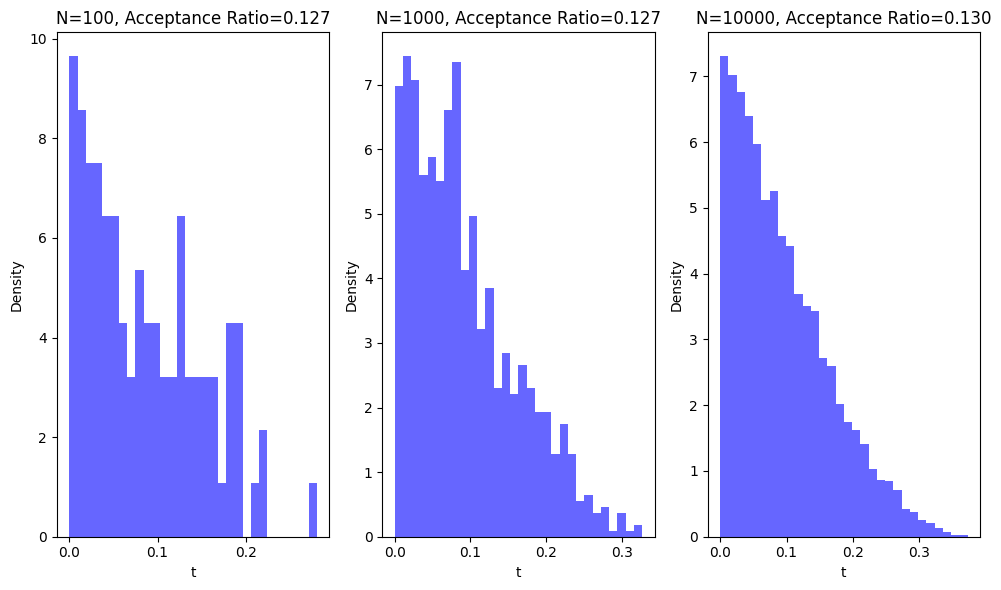

In [14]:
#task3a

import numpy as np
import matplotlib.pyplot as plt

def rejection_sampling(N, a=4, b=4):
   
    tf = np.pi / (2 * a)  #tf based on the periodicity of cos^2(at)
    M = 1  #upper bound approx
    accepted_samples = []
    total_attempts = 0
    
    while len(accepted_samples) < N:
        total_attempts += 1
        t = np.random.uniform(0, tf)
        u = np.random.uniform(0, M)
        p_t = np.exp(-b * t) * np.cos(a * t) ** 2
        q_t = 1 / tf  
        if u < p_t / (M * q_t):
            accepted_samples.append(t)
    
    return np.array(accepted_samples), len(accepted_samples) / total_attempts


N_values = [100, 1000, 10000]

tf = np.pi / (2 * 4)
plt.figure(figsize=(10, 6))

for i, N in enumerate(N_values):
    samples, acceptance_ratio = rejection_sampling(N)
    plt.subplot(1, 3, i + 1)
    plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')
    plt.xlabel("t")
    plt.ylabel("Density")
    plt.title(f"N={N}, Acceptance Ratio={acceptance_ratio:.3f}")

plt.tight_layout()
plt.savefig("rejection_sampling_histograms.png")  
plt.show()


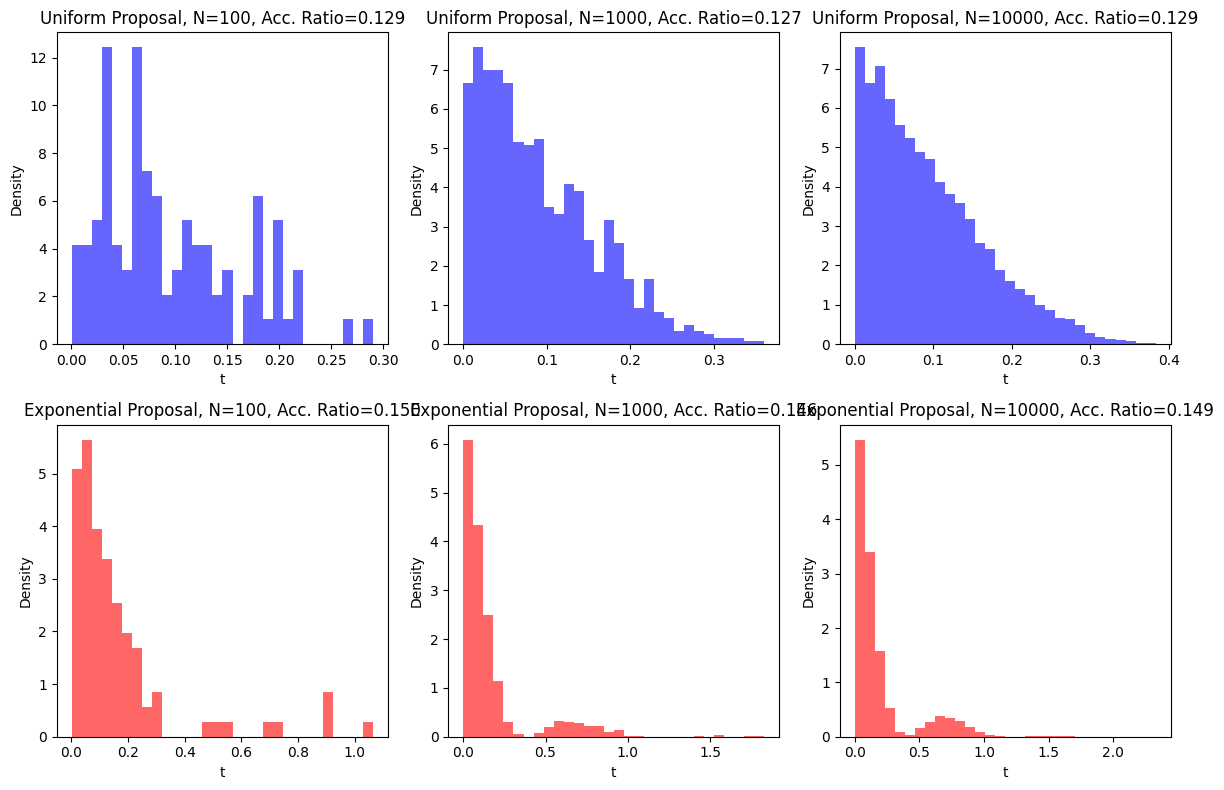

In [15]:
#task3b 

import numpy as np
import matplotlib.pyplot as plt

def rejection_sampling_uniform(N, a=4, b=4):
    
    tf = np.pi / (2 * a)  
    M = 1  
    accepted_samples = []
    total_attempts = 0
    
    while len(accepted_samples) < N:
        total_attempts += 1
        t = np.random.uniform(0, tf)
        u = np.random.uniform(0, M)
        p_t = np.exp(-b * t) * np.cos(a * t) ** 2
        q_t = 1 / tf  
        if u < p_t / (M * q_t):
            accepted_samples.append(t)
    
    return np.array(accepted_samples), len(accepted_samples) / total_attempts

def rejection_sampling_exponential(N, a=4, b=4):
    
    M = 1  
    accepted_samples = []
    total_attempts = 0
    
    while len(accepted_samples) < N:
        total_attempts += 1
        t = np.random.exponential(1/2)  
        u = np.random.uniform(0, M)
        p_t = np.exp(-b * t) * np.cos(a * t) ** 2
        q_t = 2 * np.exp(-2 * t)  
        if u < p_t / (M * q_t):
            accepted_samples.append(t)
    
    return np.array(accepted_samples), len(accepted_samples) / total_attempts


N_values = [100, 1000, 10000]

plt.figure(figsize=(12, 8))

for i, N in enumerate(N_values):
    samples_uniform, acceptance_ratio_uniform = rejection_sampling_uniform(N)
    samples_exponential, acceptance_ratio_exponential = rejection_sampling_exponential(N)
    
    plt.subplot(2, 3, i + 1)
    plt.hist(samples_uniform, bins=30, density=True, alpha=0.6, color='b', label='Uniform Proposal')
    plt.xlabel("t")
    plt.ylabel("Density")
    plt.title(f"Uniform Proposal, N={N}, Acc. Ratio={acceptance_ratio_uniform:.3f}")
    
    plt.subplot(2, 3, i + 4)
    plt.hist(samples_exponential, bins=30, density=True, alpha=0.6, color='r', label='Exponential Proposal')
    plt.xlabel("t")
    plt.ylabel("Density")
    plt.title(f"Exponential Proposal, N={N}, Acc. Ratio={acceptance_ratio_exponential:.3f}")

plt.tight_layout()
plt.savefig("rejection_sampling_comparison.png")  
plt.show()
